# Explore the SCD data set

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [3]:
scd= pd.read_pickle('../deliver/NIST_CeramicDataSet.pkl')

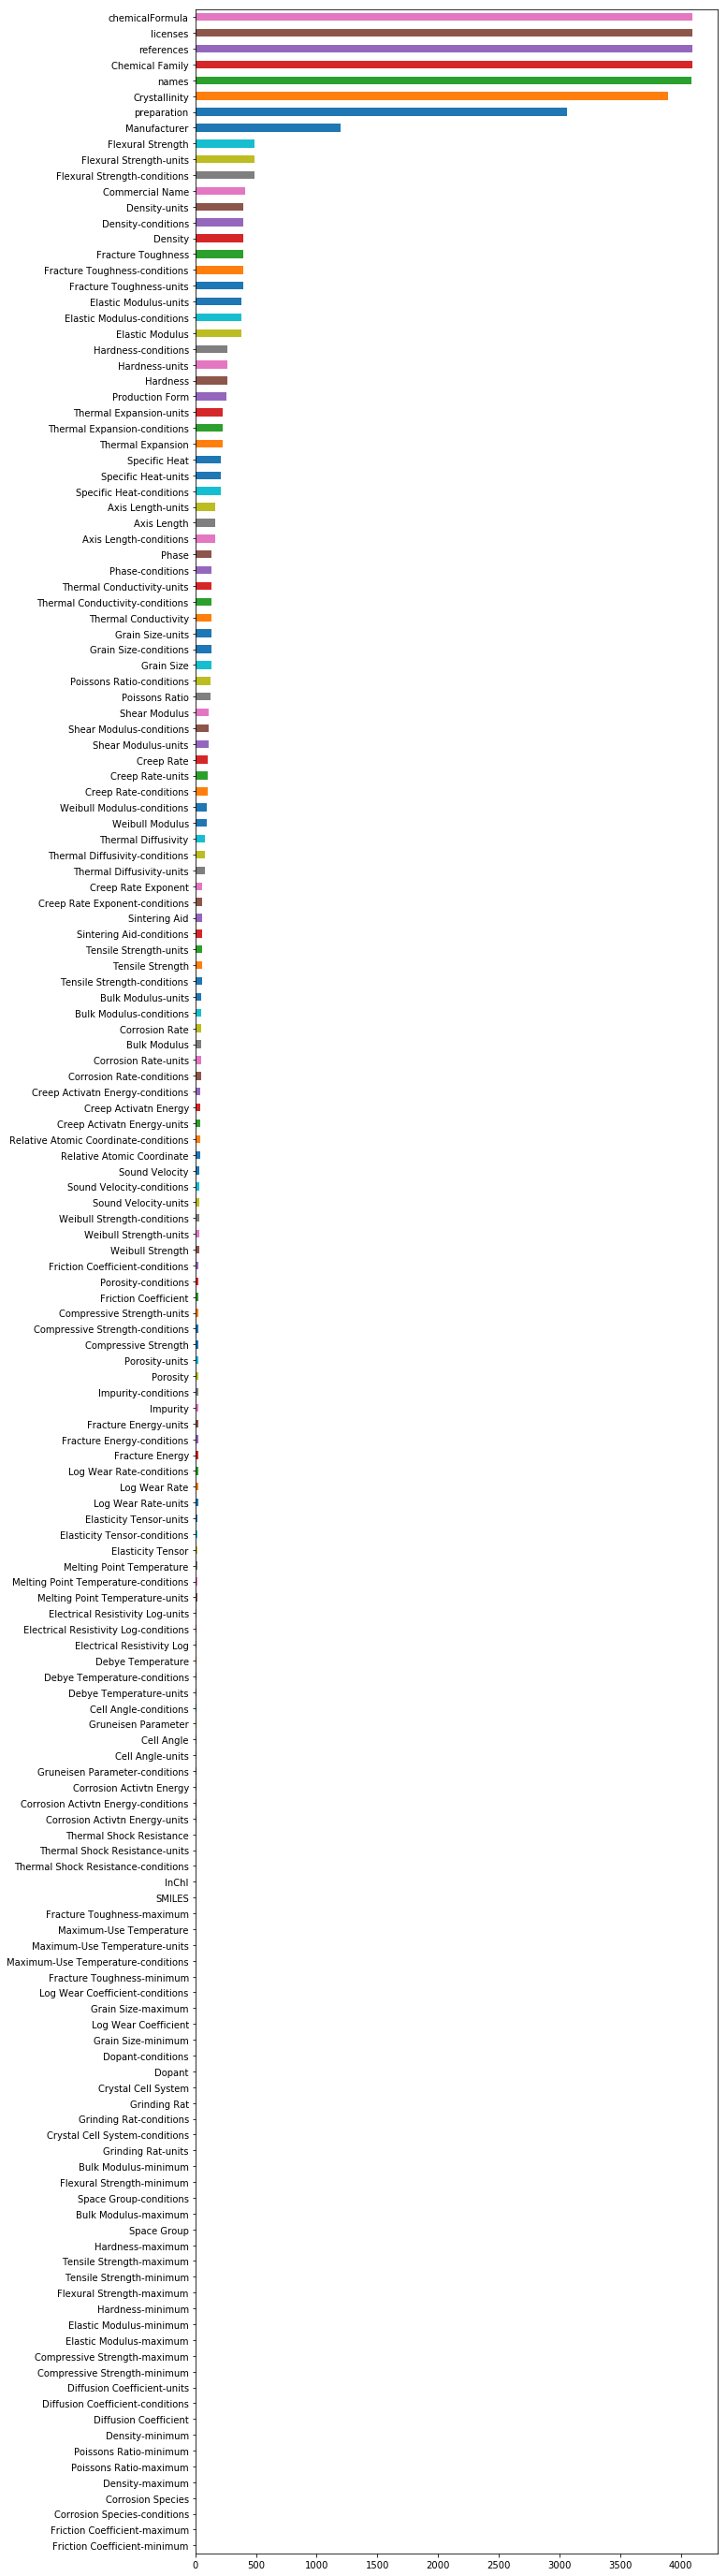

In [4]:
plt.figure(figsize= (10,50))
scd.count().sort_values().plot.barh()
plt.show()
plt.close()

Check that all entries are in the same units

In [5]:
flag= False
for item in scd.keys():
    if not('units' in item):
        continue
    if len(np.unique(scd[item].dropna()))==1:
        continue
    print(item)
    flag= True
if not(flag):
    print('All entries quoted in the same units')

All entries quoted in the same units


Lets choose some subset of the parameters to look at

In [17]:
# New DataFrame containing only samples with a density value
scd_dens = scd[scd.isnull()['Density'] == False]

In [19]:
len(np.unique(scd_dens['chemicalFormula'].dropna()))

110

TypeError: '<' not supported between instances of 'str' and 'float'

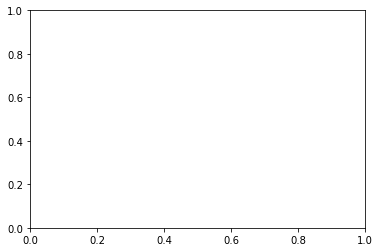

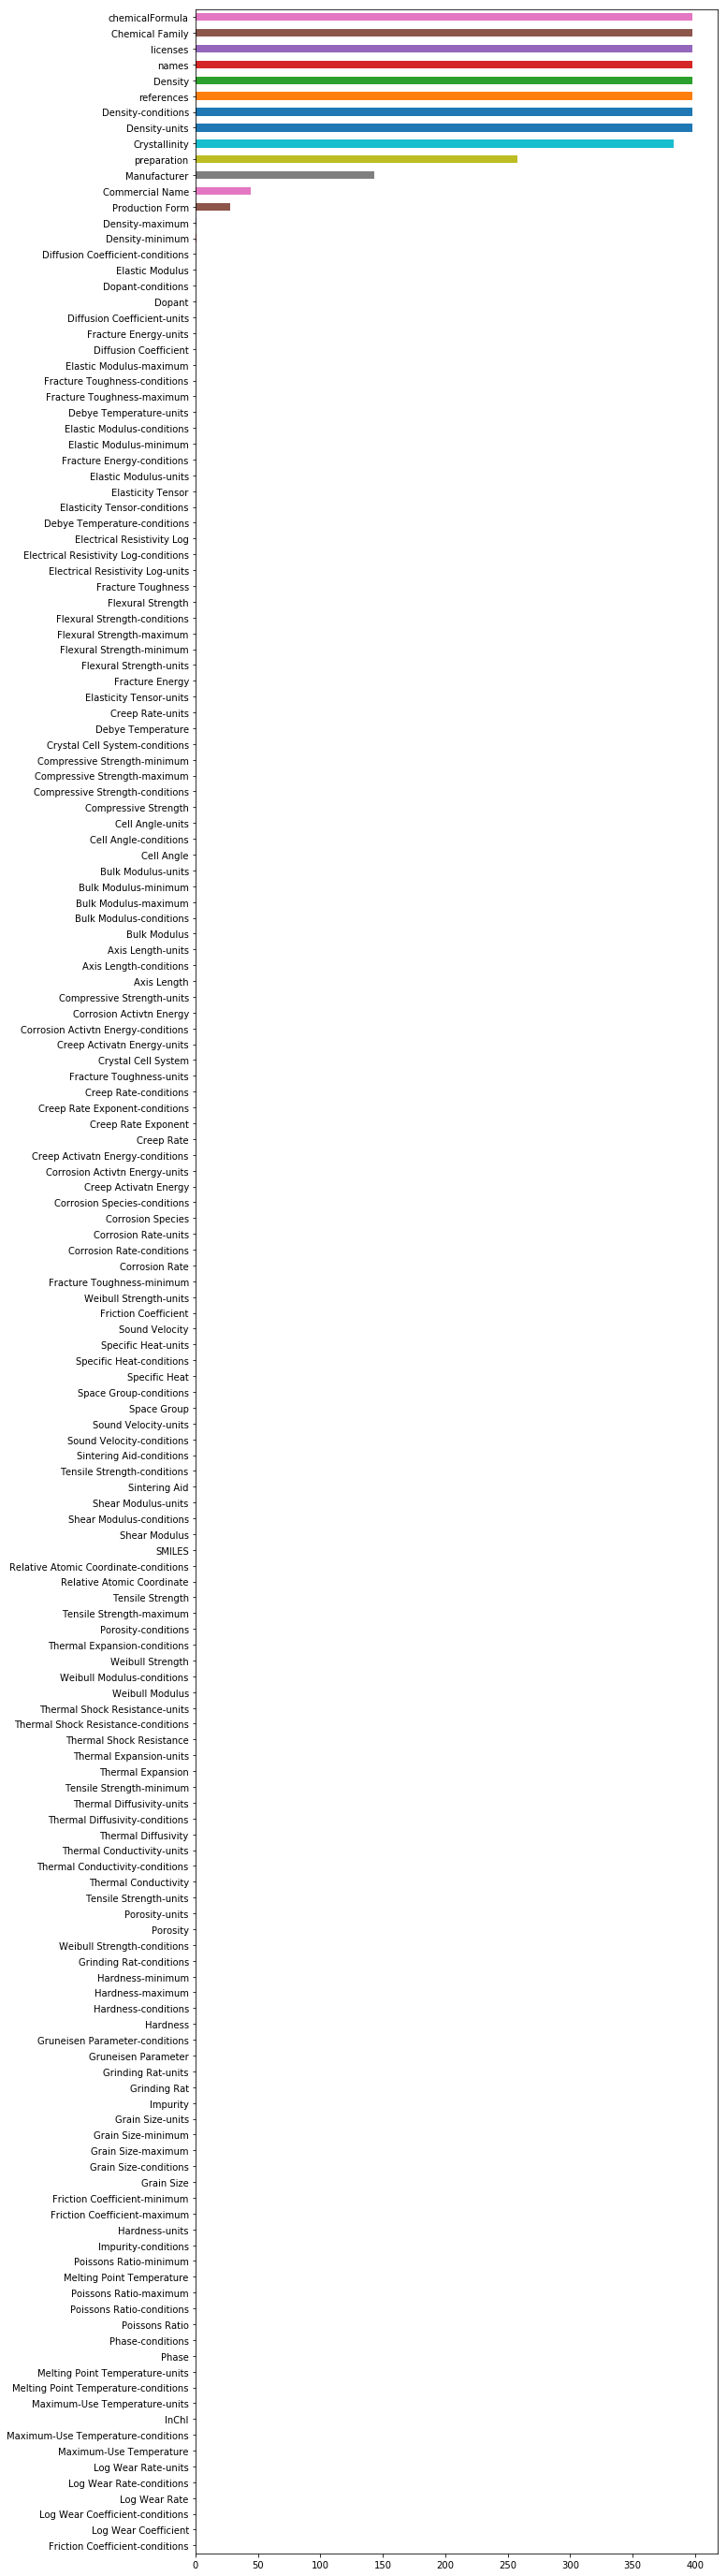

In [11]:
plt.figure(figsize= (10,50))
scd_dens.count().sort_values().plot.barh()
plt.show()
plt.close()

Lets take a look at some data columns that have a decent number of entries. Unfortunately, it seems that a lot of the items that have entries for densities do not have entries for these columns like elastic modulus, hardness etc. Can we use matminer to fill in the denisities for those materials?

<b> Start: Digression</b>

Lets try to look at some of these data columns. Find clustered values or something

In [14]:
scd_count= scd.count().sort_values()
mask= (scd_count>100) & (scd_count<800)
datKeys= scd_count[mask].keys()

In [15]:
print(datKeys)

Index(['Creep Rate-conditions', 'Creep Rate-units', 'Creep Rate',
       'Shear Modulus-units', 'Shear Modulus-conditions', 'Shear Modulus',
       'Poissons Ratio', 'Poissons Ratio-conditions', 'Grain Size',
       'Grain Size-conditions', 'Grain Size-units', 'Thermal Conductivity',
       'Thermal Conductivity-conditions', 'Thermal Conductivity-units',
       'Phase-conditions', 'Phase', 'Axis Length-conditions', 'Axis Length',
       'Axis Length-units', 'Specific Heat-conditions', 'Specific Heat-units',
       'Specific Heat', 'Thermal Expansion', 'Thermal Expansion-conditions',
       'Thermal Expansion-units', 'Production Form', 'Hardness',
       'Hardness-units', 'Hardness-conditions', 'Elastic Modulus',
       'Elastic Modulus-conditions', 'Elastic Modulus-units',
       'Fracture Toughness-units', 'Fracture Toughness-conditions',
       'Fracture Toughness', 'Density', 'Density-conditions', 'Density-units',
       'Commercial Name', 'Flexural Strength-conditions',
       'Fle